<a href="https://colab.research.google.com/github/sohangaonkar/DATA-Analysis-TMDB-movies/blob/main/DATA_Analysis_TMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing lib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data and showing its first 5 lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185.0,7.1,2015.0,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480.0,6.3,2015.0,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292.0,7.5,2015.0,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947.0,7.3,2015.0,1.747999e+08,1.385749e+09


In [3]:
# printing dataframe columns' info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4960 non-null   int64  
 1   imdb_id               4953 non-null   object 
 2   popularity            4960 non-null   float64
 3   budget                4960 non-null   int64  
 4   revenue               4960 non-null   int64  
 5   original_title        4960 non-null   object 
 6   cast                  4909 non-null   object 
 7   homepage              1995 non-null   object 
 8   director              4927 non-null   object 
 9   tagline               3482 non-null   object 
 10  keywords              4059 non-null   object 
 11  overview              4955 non-null   object 
 12  runtime               4959 non-null   float64
 13  genres                4946 non-null   object 
 14  production_companies  4424 non-null   object 
 15  release_date         

In [4]:

# taking a look at number of unique values
df.nunique()

,0
id,4959
imdb_id,4952
popularity,4947
budget,343
revenue,2014
original_title,4918
cast,4887
homepage,1975
director,3252
tagline,3465


In [5]:

# closer look at the vote_average values
df.vote_average

,vote_average
0,6.5
1,7.1
2,6.3
3,7.5
4,7.3
...,...
4955,7.4
4956,6.3
4957,6.9
4958,6.5


In [6]:
# calculating duplicated values
df.duplicated().sum()

np.int64(1)

In [7]:
# dropping duplicares and validating the excution
df.drop_duplicates(inplace = True)
df.duplicated().any()

np.False_

In [8]:

df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
# dropping unuseful columns
df.drop(['id', 'imdb_id', 'homepage', 'revenue_adj', 'budget_adj', 'tagline', 'cast', 'overview', 'keywords', 'production_companies', 'director', 'release_date'], axis = 1, inplace = True)

In [10]:
# check for data frame shape
df.shape

(4959, 9)

In [11]:

df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
runtime,1
genres,14
vote_count,1
vote_average,1
release_year,1


In [12]:

# dropping NaNs ans confirming excution
df.dropna(inplace = True)
df.isnull().any().sum()

np.int64(0)

In [13]:

# split values in the hyprid dataframe
df['genres'] = df['genres'].apply(lambda x: x.split("|")[0])
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124.0,Action,5562.0,6.5,2015.0
1,28.419936,150000000,378436354,Mad Max: Fury Road,120.0,Action,6185.0,7.1,2015.0
2,13.112507,110000000,295238201,Insurgent,119.0,Adventure,2480.0,6.3,2015.0
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136.0,Action,5292.0,7.5,2015.0
4,9.335014,190000000,1506249360,Furious 7,137.0,Action,2947.0,7.3,2015.0


In [14]:

# adding new column for movie profit (revenue - budget)
df['profit'] = df.revenue - df.budget
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124.0,Action,5562.0,6.5,2015.0,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120.0,Action,6185.0,7.1,2015.0,228436354
2,13.112507,110000000,295238201,Insurgent,119.0,Adventure,2480.0,6.3,2015.0,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136.0,Action,5292.0,7.5,2015.0,1868178225
4,9.335014,190000000,1506249360,Furious 7,137.0,Action,2947.0,7.3,2015.0,1316249360


In [15]:

def catigorize_col (df, col, labels):
    """
    catigorizes a certain column based on its quartiles

    Args:
        (df)     df   - dataframe we are proccesing
        (col)    str  - to be catigorized column's name
        (labels) list - list of labels from min to max

    Returns:
        (df)     df   - dataframe with the categorized col
    """

    # setting the edges to cut the column accordingly
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df


In [16]:
# define labels for these edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
catigorize_col(df, 'vote_average', labels)

df['vote_average'].unique()

['average', 'popular', 'below_avg', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [17]:
# dropping nans and confirming
df.dropna(inplace = True)
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
runtime,0
genres,0
vote_count,0
vote_average,0
release_year,0
profit,0


In [18]:

# define labels for these edges
labels = ['low', 'average', 'high']
catigorize_col(df, 'profit', labels)

df['profit'].unique()

['high', 'low', 'average', NaN]
Categories (3, object): ['low' < 'average' < 'high']

In [19]:

df.profit.isnull().sum()

np.int64(1)

In [20]:

# dropping NaNs in profic column and confirming
df.dropna(inplace = True)
df.isnull().sum()


,0
popularity,0
budget,0
revenue,0
original_title,0
runtime,0
genres,0
vote_count,0
vote_average,0
release_year,0
profit,0


In [21]:

df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124.0,Action,5562.0,average,2015.0,high
1,28.419936,150000000,378436354,Mad Max: Fury Road,120.0,Action,6185.0,popular,2015.0,high
2,13.112507,110000000,295238201,Insurgent,119.0,Adventure,2480.0,average,2015.0,high
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136.0,Action,5292.0,popular,2015.0,high
4,9.335014,190000000,1506249360,Furious 7,137.0,Action,2947.0,popular,2015.0,high


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4943 entries, 0 to 4958
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   popularity      4943 non-null   float64 
 1   budget          4943 non-null   int64   
 2   revenue         4943 non-null   int64   
 3   original_title  4943 non-null   object  
 4   runtime         4943 non-null   float64 
 5   genres          4943 non-null   object  
 6   vote_count      4943 non-null   float64 
 7   vote_average    4943 non-null   category
 8   release_year    4943 non-null   float64 
 9   profit          4943 non-null   category
dtypes: category(2), float64(4), int64(2), object(2)
memory usage: 357.5+ KB


EDA

In [23]:
# get median of popularity to compare with
df['popularity'].mean()

np.float64(0.7324982132308314)

In [24]:

# split popular movies into two groups around the median
less_popular = df.query('popularity <= 0.647')
more_popular = df.query('popularity >  0.647')

In [25]:

# get mean quality revenue for the less and more popularity groups
print(less_popular.revenue.mean(), more_popular.revenue.mean())

5827743.482281763 133462251.63043478


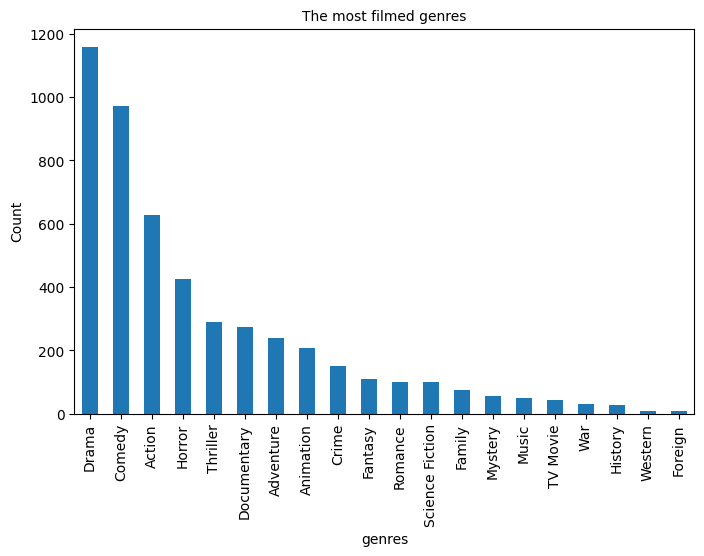

In [26]:

# visualising genres distribution
plt.figure(figsize=(8,5))
df['genres'].value_counts().plot(kind="bar")
plt.title("The most filmed genres", fontsize=(10))
plt.xlabel("genres", fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.show()

In [27]:
df['genres'].describe()

,genres
count,4943
unique,20
top,Drama
freq,1158


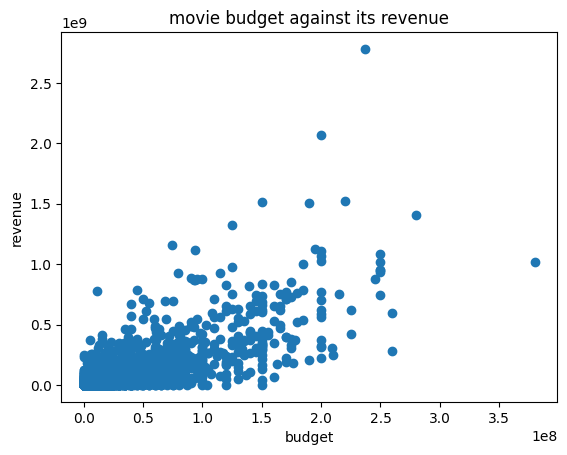

In [28]:

# plotting budget against revenue
plt.scatter(df['budget'],df['revenue']);
plt.title("movie budget against its revenue");
plt.xlabel('budget', fontsize=10);
plt.ylabel('revenue',fontsize=10);